# Aprendizaje supervisado - Regresión Logística
***

La idea ahora, que ya tenemos nuestra matriz de datos/características pre-procesada, es iniciar nuestro recorrido por los algoritmos de clasificación. Para ello contaremos con una base de datos muy conocida en el ML llamada Iris

## Iris
***

Esta base de datos continuene 50 muestras de 3 diferentes tipos de iris (150 muestras en total). Las características de cada una de las observaciones son: la longitud y el ancho del sépalo,  y la longitud y ancho del pétalo. El objetivo de ML con esta base de datos es predecir la especie de iris de acuerdo a sus medidas.

Las especies de irir son: Iris Setosa, Iris Versicolour, Iris Virginica.

![Iris](http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg)

Para cargar la base de datos desde la librería scikit-learn utilizamos las siguietnes instrucciones

In [8]:
from sklearn import datasets
import numpy as np

In [9]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(np.unique(y))

[0 1 2]


## Regresión logística

Es un algoritmo simple pero potente para problemas de clasificación lineales y binarios. A pesar del nombre no es un modelo de regresión, es un modelo de clasificación.

La regresión logística es un modelo de clasificación muy simple de implementar y que funciona muy bien en clases linealmente separables. A nivel industrial es uno de los modelos más utilizados. 

Dado que es un clasificador binario, si se desea extender sus prestaciones a clasificación multiclase de debe utilizar la técnica OvR.

### Definiciones

Algunas definiciones importantes para entender este tipo de clasificadores son:

1. *Odds ratio o razón de momios:*
>La razón de momios  indica la probabilidad a favor de un evento particular, y puede ser escrita como $\frac{p}{1-p}$, donde $p$ denota la probabilidad del evento positivo. Siendo el evento positivo, el evento que queremos predecir.

2. *Función logit:*
>La función *logit* se define como el logaritmo de la razón de momios:

$$logit(p)=\log\frac{p}{1-p}$$

 La función *logit* toma valores de entrada en el rango de 0 a 1 y los transofrma que números reales, con lo que se puede expresar la siguiente relación lineal entre las características y estos valores.

$$logit(P(y=1|\mathbf{x}))=w_0x_0+w_1x_1+\ldots+w_px_p= \sum_{j=0}^{p}w_jx_j=\mathbf{w}^{\top}\mathbf{x}$$

### Funcionamiento

La probabilidad de que cierta muestra pertenezca a una clase particular, que es el objeto de nuestro interés,  es la forma inversa de la función *logit*. Esta función es llamada *función logística* o *sigmoid*, y se define como:

$$\phi(z)=\frac{1}{1+e^{-z}}$$

En este caso $z$ es la red de entrada, i.e., la combinación lineal de l os pesos y las características, $z=\mathbf{w}^{\top}\mathbf{x}$. 

La función sigmoide se verá de la siguiente manera

In [10]:
import matplotlib.pyplot as plt #librería para graficar
import math

#ahora definiremos una función que represente el sigmoide
def sigmoide(z):
    funcion_sigmoide = 1.0/(1.0+np.exp(-z))
    return funcion_sigmoide

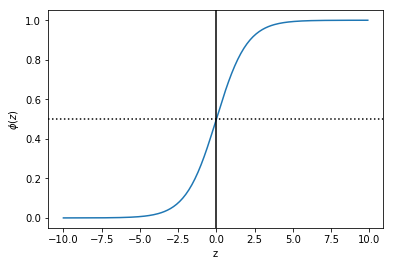

In [11]:
#para probarla debemos generar la malla en z
z = np.mgrid[-10:10:0.1]#-10 y 10 son unos valores para visualizar
fi = sigmoide(z)
plt.plot(z,fi)
plt.axvline(0,0,color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.ylabel('$\phi(z)$')
plt.xlabel('z')
plt.show()


La salida de la función *sigmoide* $\phi(z) = P(y=1|\mathbf{x};\mathbf{w})$ puede ser interpretada como la probabilidad de una observación particual de pertenecer a la clase 1, dadas sus características $\mathbf{x}$ parametrizadas por los pesos $\mathbf{w}$.

*Ejemplo*

Si calculamos $\phi = 0.8$ para una muestra  determinada en la base de datos Iris, significa que la probabilidad de que sea una Iris Versicolour es del 80%. Similarmente, para una Iris Setosa puede calcularse así: 

$$P(y=0|\mathbf{x};\mathbf{w})=1-P(y=1|\mathbf{x};\mathbf{w})=0.2 $$

La probabilidad de  salida se puede convertir en una salida binaria a través de un cuantizador (una función de escalón unitario):

$$ \hat{y}=\left\{\begin{array}{cc}
1& \phi(z)\leq 0.5\\
0& otros
\end{array}\right.$$

###  Sintonización de parámetros

Para la sintonización o el cálculo de los pesos $w$, se debe tener en cuenta la función de costo que se desea minimizar o maximizar. En nuestro caso la función de costo es el error cuadrático medio:

$$J(\mathbf{w})=\frac{1}{2}\sum_{i}(\phi(z_i)-y_i)^2$$

Este error corresponde a la diferencia que hay entre la clase estimada y la etiqueta real de cada observación. Ahora bien, la minimización de la función de costos implica la maximización de la función de verosimilitud, definida como:

$$L(\mathbf{w}) = P(\mathbf{y}|\mathbf{x};\mathbf{w})=\prod_{i=1}^{n}P(y_i|x_i;\mathbf{w})=\prod_{i=1}^{n}(\phi(z_i))^{y_i}(1-\phi(z_i))^{1-y_i}$$

Dado que es más fácil maximizar el logaritmo de la función de verosimilitud, tenemos que:

$$l(\mathbf{w})=\log(L(\mathbf{w}))=\sum_{i=1}^{n}[y_i\log(\phi(z_i))+(1-y_i)\log(1-\phi(z_i))]$$

Ahora bien, podemos usar un algoritmo como gradiente ascendente para maximizar la función de verosimilitud o minimizarla a través de gradiente descendente. Para la minimización tendremos que la función de costos debe ser:

$$J(\mathbf{w})= \sum_{i=1}^{n}[-y_i\log(\phi(z_i))-(1-y_i)\log(1-\phi(z_i))]$$


## Implementación

Para implementar nuestro clasificador, utilizaremos el modelo de la librería scikit-learn sobre la base de datos Iris. Primero debemos importar el clasificador y organizar los datos.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # con esta librería podemos dividir nuestra base de datos en entrenamiento y validación
from sklearn.preprocessing import StandardScaler

#primero hacemos nuestra partición de la DB

X = iris.data[:,[2,3]] #tomaremos solo dos características 
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

#Removemos la media y quitamos la varianza. Ojo con la normalización del conjunto de entrenamiento

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

Ahora entrenamos el clasificador:

In [13]:
clasificador = LogisticRegression(C=1000.0, random_state = 0) #valores pequeños de C especifican mayor regularización
clasificador.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
# Para hacer las predicciones
y_pred = clasificador.predict(X_test_std)
print('Las muestras mal clasificadas fueron %d' % (y_test != y_pred).sum())

Las muestras mal clasificadas fueron 1


In [15]:
import matplotlib.pyplot as plt
import numpy as np

def visualizar_clasificador(clasificador, X, y):
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    #definimos el paso de la malla
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    print(resultados)
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Paired)
    #ubicamos los puntos
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()

[0 0 0 ..., 2 2 2]


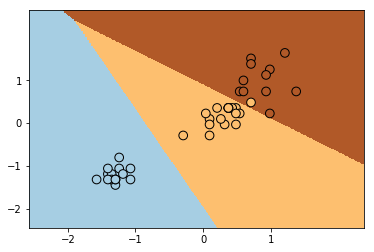

In [16]:
visualizar_clasificador(clasificador,X_test_std,y_test)